In [1]:
!pip install bs4
!pip install selenium
!pip install pandas
!pip install html5lib
!pip install matplotlib
!pip install scikit-learn
!pip install lxml

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import database
import requests

In [5]:
url = "https://data.ontario.ca/dataset/c43fd28d-3288-4ad2-87f1-a95abac706b8/resource/3273c977-416f-407e-86d2-1e45a7261e7b/download/deaths_fatality_type.csv"
filename = 'deaths_fatality_type.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

with open(filename, mode="wb") as file:
    file.write(response.content)

In [6]:
import pandas as pd
filename = 'deaths_fatality_type.csv'
all_cases = pd.read_csv(filename)

In [7]:
# Inspect the data
all_cases.head()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
0,2020-04-01,17,12,2,3
1,2020-04-02,30,24,2,4
2,2020-04-03,21,14,2,5
3,2020-04-04,30,23,2,5
4,2020-04-05,28,19,3,6


In [8]:
all_cases.tail()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing
1690,2024-11-16,1,0,1,0
1691,2024-11-17,0,0,0,0
1692,2024-11-18,0,0,0,0
1693,2024-11-19,0,0,0,0
1694,2024-11-20,0,0,0,0


In [9]:
len(all_cases)

1695

In [10]:
#Checking for missing values: Removing rows with missing data
all_cases.dropna(inplace=True)

In [11]:
len(all_cases)

1695

**No missing data!**

## Statistics on daily numbers of deaths linked to Covid in Ontario on the period considered (from April 1st, 2020 to November 20th, 2024)

In [12]:
# Creating a new variable describing the proportion of linked to Covid (attributable or contributing) in Ontario per day
all_cases['death_link_covid'] = all_cases['death_covid'] + all_cases['death_covid_contrib']
all_cases['prop_death_covid']= (all_cases['death_covid'] + all_cases['death_covid_contrib']) / all_cases['deaths_total'] 

In [13]:
# Summary Statistic 1: Distribution of the number of death attributable to Covid19
all_cases.describe()

,deaths_total,death_covid,death_covid_contrib,death_unknown_missing,death_link_covid,prop_death_covid
count,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1592.000000
mean,11.189971,7.824779,2.751622,0.613569,10.576401,0.957383
std,13.818627,10.168851,3.293623,1.423759,12.847665,0.099542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,2.000000,0.948049
50%,6.000000,4.000000,2.000000,0.000000,6.000000,1.000000
75%,14.000000,9.000000,4.000000,1.000000,13.000000,1.000000
max,87.000000,68.000000,22.000000,13.000000,83.000000,1.000000


**On average, more than 95% of daily deaths were linked to Covid**

In [19]:
#Checking for missing values: Removing rows with missing data
all_cases.dropna(inplace=True)

In [18]:
all_cases['date'] = pd.to_datetime(all_cases['date'])

In [77]:
all_cases['Death_Year'] = all_cases['date'].dt.year
all_cases['Death_Month'] = all_cases['date'].dt.month

In [78]:
all_cases.head()

,date,deaths_total,death_covid,death_covid_contrib,death_unknown_missing,prop_death_covid,death_link_covid,Death_Year,Death_Month
0,2020-04-01,17,12,2,3,0.823529,14,2020,4
1,2020-04-02,30,24,2,4,0.866667,26,2020,4
2,2020-04-03,21,14,2,5,0.761905,16,2020,4
3,2020-04-04,30,23,2,5,0.833333,25,2020,4
4,2020-04-05,28,19,3,6,0.785714,22,2020,4


In [81]:
# Summary Statistic 2: Number of deaths linked to Covid per year and month
all_cases.groupby([all_cases['Death_Year'], all_cases['Death_Month']])['death_link_covid'].mean()

Death_Year  Death_Month
2020        4              42.866667
            5              29.967742
            6               6.766667
            7               2.225806
            8               0.677419
            9               1.666667
            10              6.677419
            11             17.433333
            12             31.645161
2021        1              51.225806
            2              22.000000
            3              12.903226
            4              26.000000
            5              22.483871
            6               6.533333
            7               3.516129
            8               2.000000
            9               5.200000
            10              4.032258
            11              4.333333
            12              7.677419
2022        1              48.612903
            2              27.535714
            3               9.322581
            4              13.400000
            5              12.290323
            6 

<Axes: xlabel='Death_Year,Death_Month'>

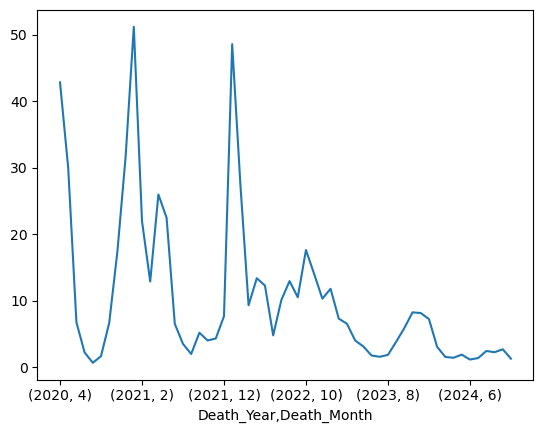

In [107]:
# Distribution of death linked to Covid according to time
all_cases.groupby([all_cases['Death_Year'], all_cases['Death_Month']])['death_link_covid'].mean().plot()

In [124]:
# Visualization with Matplotlib: Distribution of the number of cases linked to Covid19 per day

import matplotlib.pyplot as plt
import numpy as np

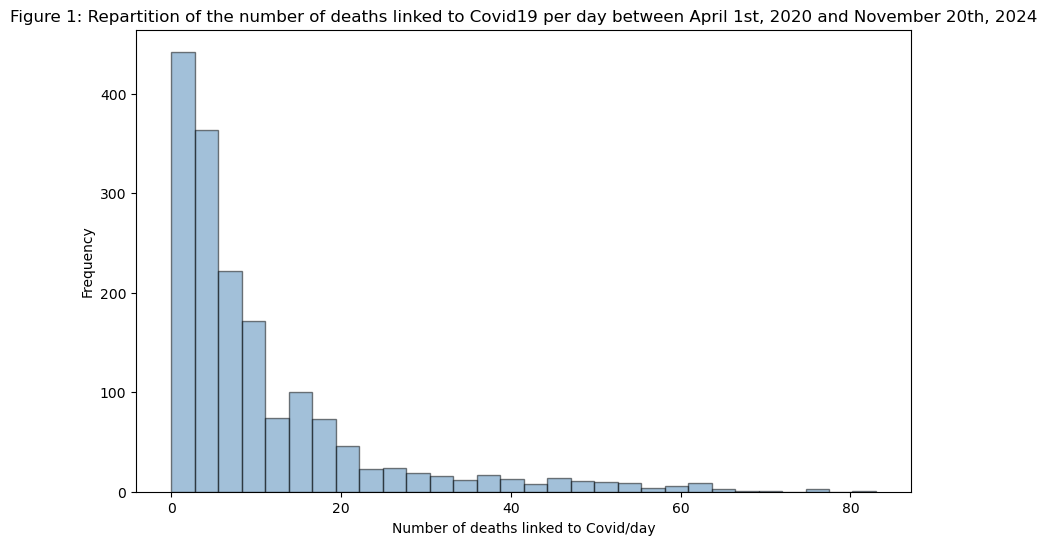

In [135]:
data = all_cases['death_link_covid']

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, alpha=0.5, color='steelblue', edgecolor='black')
plt.title('Figure 1: Repartition of the number of deaths linked to Covid19 per day between April 1st, 2020 and November 20th, 2024')
plt.xlabel('Number of deaths linked to Covid/day')
plt.ylabel('Frequency')
plt.show()

**The distribution of daily cases of Covid is assymetrical, with a lot of days where only a few deaths were linked to covid**